# Modelagem e simulação

Roberto M. Cesar Jr. - IME - USP

rmcesar@usp.br

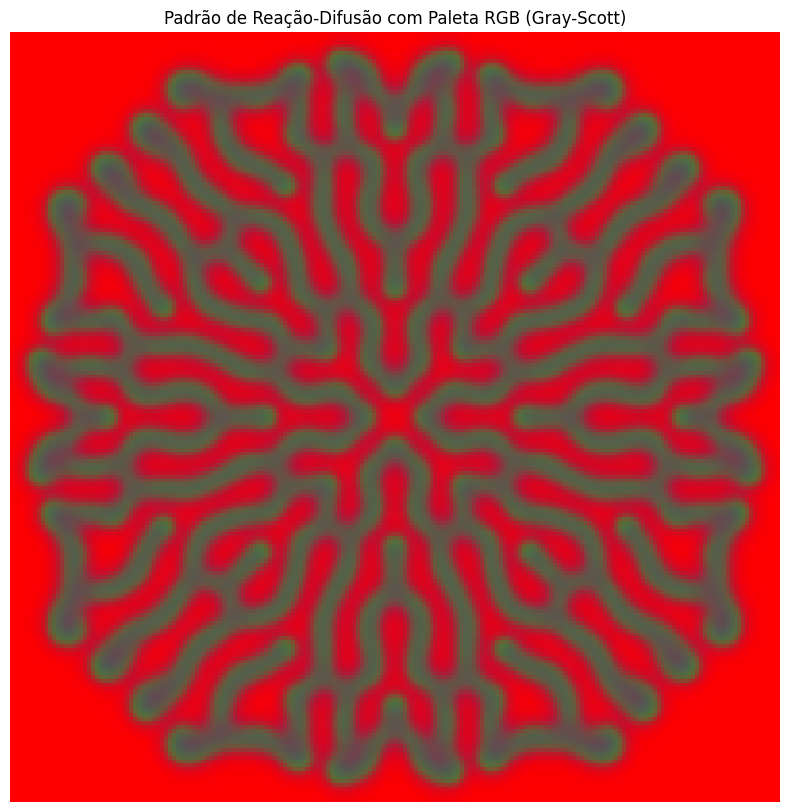

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sistema
size = 200  # Tamanho do grid
Du, Dv = 0.16, 0.08  # Coeficientes de difusão
F, k = 0.060, 0.062  # Parâmetros do sistema de Gray-Scott
time_steps = 10000  # Iterações

# Inicialização do sistema
u = np.ones((size, size))  # U começa com valores próximos de 1
v = np.zeros((size, size))  # V começa com valores próximos de 0

# Adiciona perturbação inicial
center = size // 2
r = 10  # Raio da perturbação
u[center-r:center+r, center-r:center+r] = 0.50
v[center-r:center+r, center-r:center+r] = 0.25

# Simulação
for _ in range(time_steps):
    # Difusão usando convolução
    laplacian_u = (
        np.roll(u, 1, axis=0) + np.roll(u, -1, axis=0) +
        np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1) - 4 * u
    )
    laplacian_v = (
        np.roll(v, 1, axis=0) + np.roll(v, -1, axis=0) +
        np.roll(v, 1, axis=1) + np.roll(v, -1, axis=1) - 4 * v
    )

    # Atualização das equações de reação-difusão
    uvv = u * v * v
    u += Du * laplacian_u - uvv + F * (1 - u)
    v += Dv * laplacian_v + uvv - (F + k) * v

# Mapeamento RGB
r = np.clip(u, 0, 1)  # Componente vermelho proporcional a u
g = np.clip(v, 0, 1)  # Componente verde proporcional a v
b = np.clip(1 - u - v, 0, 1)  # Componente azul como complementar

rgb_image = np.dstack((r, g, b))  # Combina os canais para formar a imagem RGB

# Visualização
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image)
plt.axis('off')
plt.title("Padrão de Reação-Difusão com Paleta RGB (Gray-Scott)")
plt.show()
